In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Loading Data Set

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
len(X_test)

10000

In [6]:
Y_train.shape

(60000,)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### No of classes

In [8]:
classes=np.unique(Y_train)
print(classes)
no_of_classes=len(classes)
print(no_of_classes)

[0 1 2 3 4 5 6 7 8 9]
10


# Plotting the image

In [9]:
def plot_sample(X,Y,index):
    plt.figure(figsize=(12,4))
    plt.imshow(X[index])
    plt.xlabel(Y[index])    

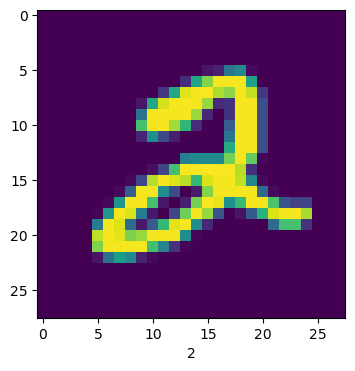

In [10]:
plot_sample(X_train,Y_train,5)

# Normalizing

In [11]:
X_train=X_train/255.0
X_test=X_test/255.0

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

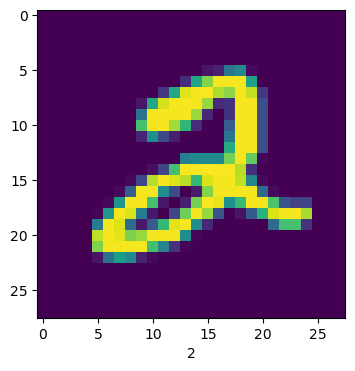

In [13]:
plot_sample(X_train,Y_train,5)

# Reshaping X_train

In [25]:
X_train_reshape= X_train.reshape(len(X_train),28,28,1)
print("Train shape: ",X_train_reshape.shape)
X_test_reshape= X_test.reshape(len(X_test),28,28,1)
print("Test shape: ",X_test_reshape.shape)

Train shape:  (60000, 28, 28, 1)
Test shape:  (10000, 28, 28, 1)


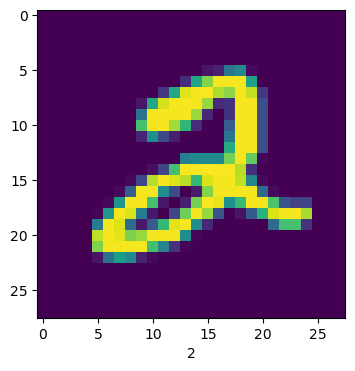

In [15]:
plot_sample(X_train_reshape,Y_train,5)

# CNN Model 

In [16]:
model=tf.keras.models.Sequential([
    # Convolution layer
    
    layers.Conv2D(filters=16, kernel_size=(2,2), padding='same',input_shape=(28,28,1), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=(2,2), padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(36,activation='relu'),
    layers.Dense(no_of_classes, activation='sigmoid')  #output layer
    
])

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 36)                5

In [18]:
model.fit(X_train_reshape, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 9ms/step - loss: 0.2106 - accuracy: 0.9360
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0712 - accuracy: 0.9783
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0518 - accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0410 - accuracy: 0.9872
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0331 - accuracy: 0.9897


In [19]:
model.evaluate(X_test_reshape,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0370 - accuracy: 0.9883


[0.03697915002703667, 0.9883000254631042]

# Evaluation

In [20]:
Y_pred=model.predict(X_test_reshape)
Y_pred[0:6]

313/313 [==============================] - 2s 4ms/step


array([[7.45331345e-05, 1.21027164e-01, 3.43946293e-02, 8.03731307e-02,
        4.71093517e-04, 4.04804196e-05, 1.56840617e-11, 9.99999702e-01,
        2.49043096e-05, 6.25706390e-02],
       [1.02471322e-01, 9.64977920e-01, 9.99999940e-01, 7.14911206e-04,
        2.00265960e-04, 7.60361090e-08, 8.11600626e-01, 5.69659956e-02,
        1.02481239e-01, 4.04657021e-06],
       [1.17978510e-02, 9.99944925e-01, 4.05433103e-02, 2.03580668e-04,
        4.75402653e-01, 5.28700883e-03, 2.26258058e-02, 7.08027840e-01,
        4.89716791e-02, 4.48990427e-03],
       [9.99984443e-01, 1.32873608e-02, 9.53590155e-01, 3.15279351e-04,
        1.98420174e-02, 7.94246048e-03, 8.16208899e-01, 8.44539821e-01,
        2.38389280e-02, 2.32447404e-02],
       [6.45122863e-03, 2.17706472e-01, 2.25497391e-02, 4.59464674e-04,
        9.99993265e-01, 2.89777934e-04, 3.74232866e-02, 7.89512157e-01,
        3.35432023e-01, 9.38083291e-01],
       [1.09062670e-02, 9.99969363e-01, 1.98083054e-02, 8.24344825e-05,
   

In [21]:
Y_pred_classes=[np.argmax(i) for i in Y_pred]
Y_pred_classes[0:6]

[7, 2, 1, 0, 4, 1]

In [22]:
Y_test[0:6]

array([7, 2, 1, 0, 4, 1], dtype=uint8)

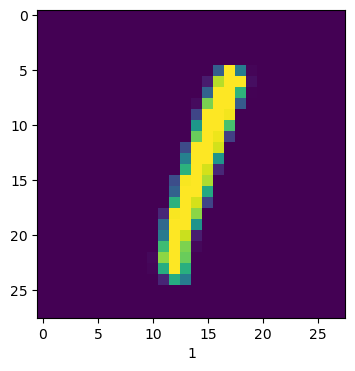

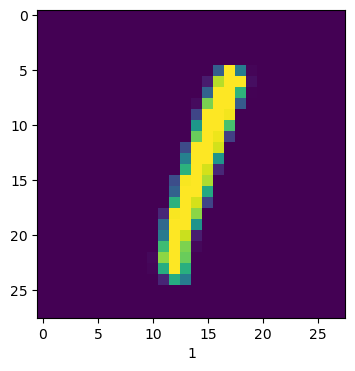

In [23]:
plot_sample(X_test_reshape,Y_test,5)
plot_sample(X_test_reshape,Y_pred_classes,5)

In [24]:
# Confusion Matrix

cm=tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred_classes)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    2,    0,    0,    0,    2,    3,    1,    0],
       [   0, 1132,    2,    1,    0,    0,    0,    0,    0,    0],
       [   0,    1, 1020,    0,    0,    0,    0,    9,    2,    0],
       [   0,    0,    3,  997,    0,    6,    0,    2,    1,    1],
       [   0,    1,    0,    0,  970,    0,    2,    1,    2,    6],
       [   2,    0,    0,    1,    0,  886,    1,    1,    0,    1],
       [   3,    3,    0,    2,    0,    2,  946,    0,    2,    0],
       [   0,    4,    4,    0,    0,    1,    0, 1019,    0,    0],
       [   3,    1,    2,    1,    1,    1,    1,    1,  956,    7],
       [   1,    3,    0,    1,    7,    4,    0,    5,    2,  986]])>